# Uniform standard OT

### Imports and Settings

In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ott

from data import get_paired_unbalanced_uniform_samplers

from jax.config import config
config.update("jax_debug_nans", True)
config.update("jax_enable_x64", True)

from tueplots import bundles
from tueplots import axes
import matplotlib.ticker as ticker

In [53]:
plt.rcParams.update(**bundles.neurips2022(usetex=False, nrows=2), **axes.lines(base_width=0.5), **{"figure.dpi": 150})

# Util Functions

In [3]:
def plot_data(source, target):
    """Plot data."""

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2.0))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(2.0))

    ax.scatter(target[:, 0], target[:, 1], color='red',
               alpha=0.2, label=r'$target$')
    ax.scatter(source[:, 0], source[:, 1], color='blue',
               alpha=0.2, label=r'$source$')
    plt.axis('equal')
    plt.xlim(-1, 6)
    plt.ylim(-2, 2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend(fontsize=10)

In [100]:
def plot_ot_map_old(source, target):
    """Plot data and learned optimal transport map."""

    def draw_arrows(a, b):
        plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1],
                  color=[0.5, 0.5, 1], alpha=0.3)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2.0))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(2.0))
    
    ax.scatter(target[:, 0], target[:, 1], color='#F2545B',
               alpha=0.5, label=r'$target$')
    ax.scatter(source[:, 0], source[:, 1], color='#1A254B',
               alpha=0.5, label=r'$source$')
    
    #plt.legend(bbox_to_anchor=(0.5, 1.1), loc="center", ncol = 3, fontsize=10)
    plt.legend(fontsize=10)
    plt.xlim(-1, 6)
    plt.ylim(-2, 2)
    plt.gca().set_aspect('equal', adjustable='box')
    for i in range(target.shape[0]):
        draw_arrows(source[i, :], target[i, :])
    #plt.savefig('uniform_ot_tau0.9.png', bbox_inches='tight')

# Get Uniform Dataset

In [4]:
num_samples = 120

In [5]:
key = jax.random.PRNGKey(0)
_, _, _, loader_source, loader_target = get_paired_unbalanced_uniform_samplers(
    key=key, num_samples=num_samples
)

In [6]:
data_source = loader_source(None, full_dataset=True)
data_target = loader_target(None, full_dataset=True)
len_data_source = len(data_source)
len_data_target = len(data_target)
print(len_data_source, len_data_target)
data = np.concatenate([data_source, data_target], axis=0)

300 300


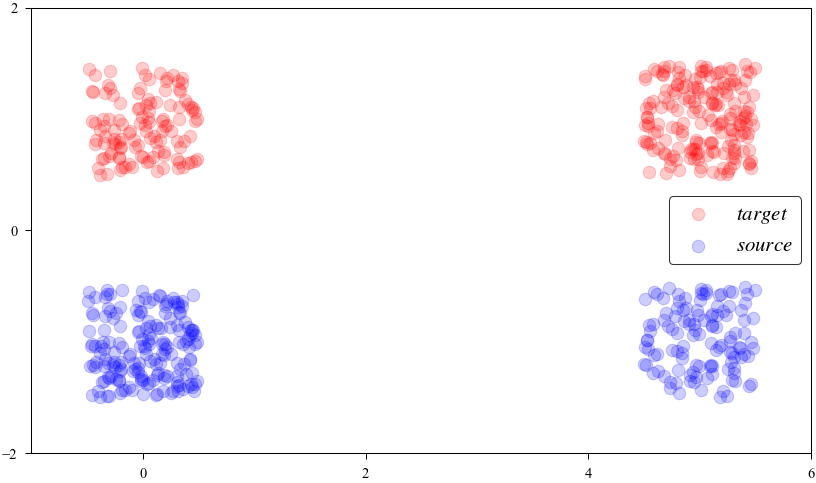

In [54]:
plot_data(data_source, data_target)

# Compute OT

In [111]:
# parameters
epsilon = 1.0
tau_a = 0.9
tau_b = 0.9
ott_scaling = jnp.ones(len_data_source) / len_data_source
samples = 300

In [112]:
# solve regularized ot between batch_source and batch_target
geom = ott.geometry.pointcloud.PointCloud(data_source, data_target, epsilon=epsilon)
out = ott.core.sinkhorn.sinkhorn(geom, ott_scaling, ott_scaling, tau_a=tau_a, tau_b=tau_b, jit=False)
# get flattened log transition matrix
transition_matrix = jnp.log(geom.transport_from_potentials(out.f, out.g).flatten())

In [113]:
# sample from transition_matrix
indeces = jax.random.categorical(key, transition_matrix, shape=[samples])
indeces_source = indeces // len_data_source
indeces_target = indeces % len_data_target

In [114]:
new_data_source = data_source[indeces_source]
new_data_target = data_target[indeces_target]

# Tau=1.0 Eps=1.0

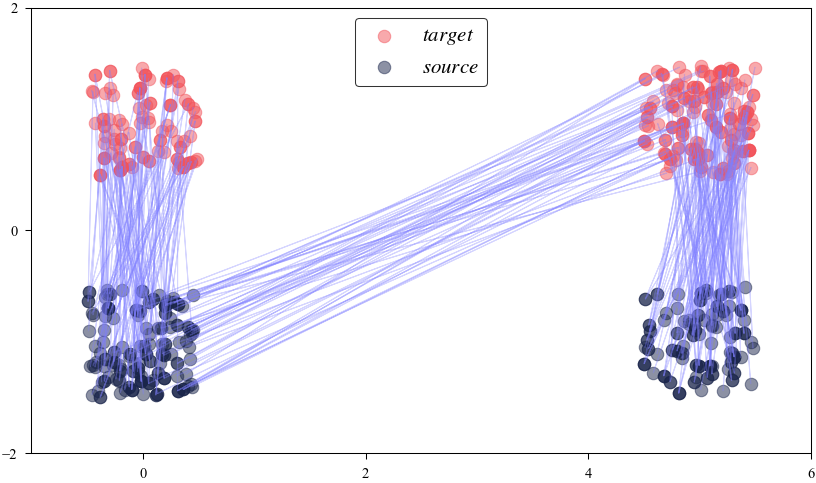

In [93]:
plot_ot_map_old(new_data_source, new_data_target)

# Tau=0.9 Eps=1.0

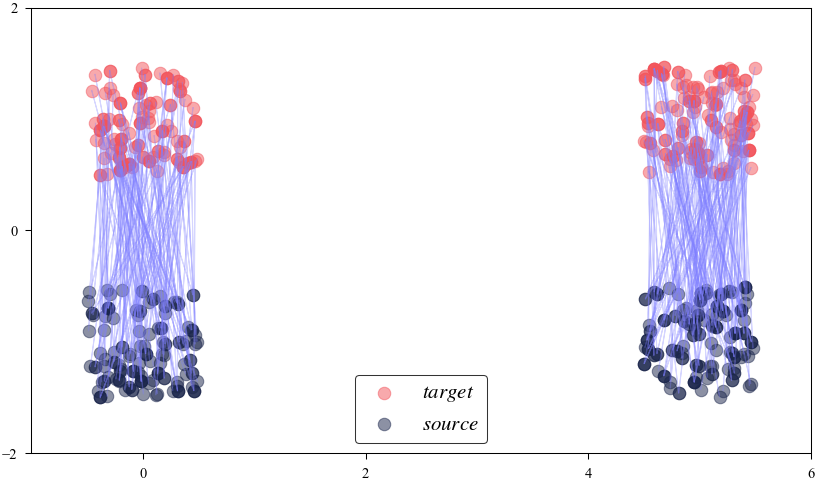

In [110]:
plot_ot_map_old(new_data_source, new_data_target)

# Tau=0.1 Eps=1.0

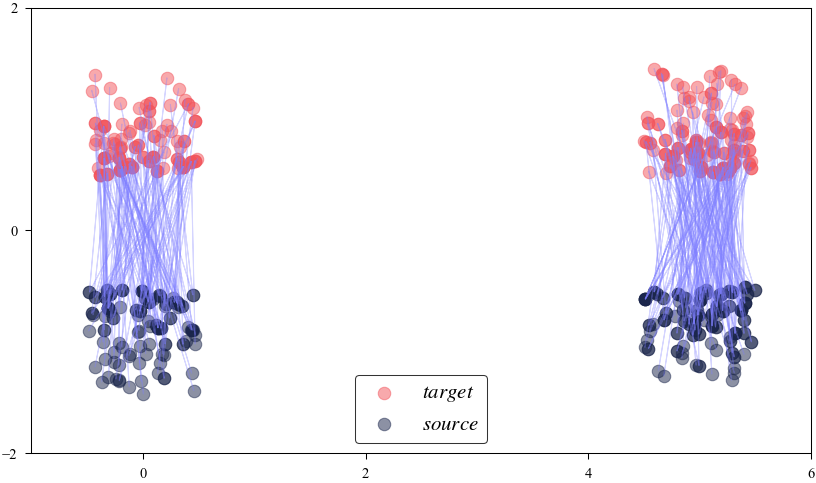

In [75]:
plot_ot_map_old(new_data_source, new_data_target)

# Tau=1.0 Eps=0.1

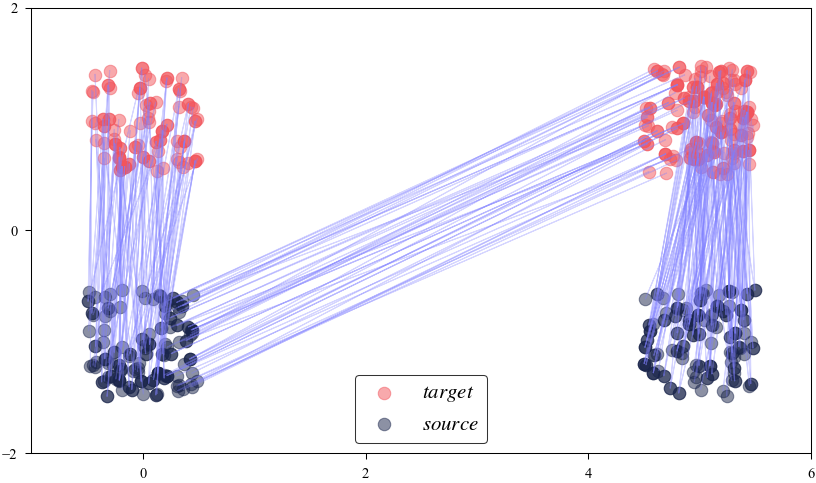

In [87]:
plot_ot_map_old(new_data_source, new_data_target)

# Tau=1.0 Eps=0.001

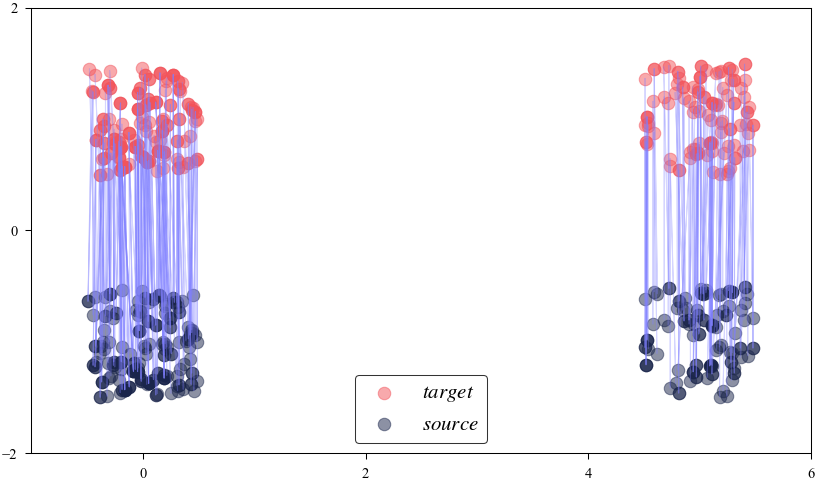

In [55]:
plot_ot_map_old(new_data_source, new_data_target)